# Work space for Nick

In [60]:
from PIL import Image
from os import listdir
import numpy as np
from matplotlib import pyplot as plt


def gray_sacle(data):
    return np.dot(data[...,:3], [0.299, 0.587, 0.114])

def read_images(directories, verb = False):
    """Reads in the all and rem directoires under each directory in the list directories"""
    X = []
    y = []
    for direct in dirs:
        if verb:
            print(f"Reading {direct}")
        direct_all = f"{direct}\\all"
        for file in listdir(direct_all):
            if verb:
                print(f"Reading file: {file}")
            image = Image.open(f"{direct_all}\\{file}")
            data = np.asarray(image)
            data = gray_sacle(data)
            data = data.ravel()
            X.append(data)
            y.append([1])
                
        direct_rem = f"{direct}\\rem"
        for file in listdir(direct_all):
            if verb:
                print(f"Reading file: {file}")
            image = Image.open(f"{direct_all}\\{file}")
            data = np.asarray(image)
            data = gray_sacle(data)
            data = data.ravel()
            X.append(data)
            y.append([0])
                
    return np.asarray(X), np.asarray(y)

def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [63]:
%%time
dirs = [
    #r'..\archive\C-NMC_Leukemia\training_data\fold_0',
    #r'..\archive\C-NMC_Leukemia\training_data\fold_1',
    #r'..\archive\C-NMC_Leukemia\training_data\fold_2'
    r'..\archive\C-NMC_Leukemia\training_data\fold_small'
]
X, y = read_images(dirs, verb=False)
print(X.shape)

(12, 202500)
Wall time: 532 ms


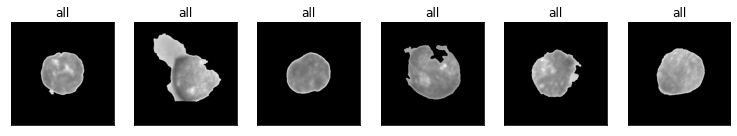

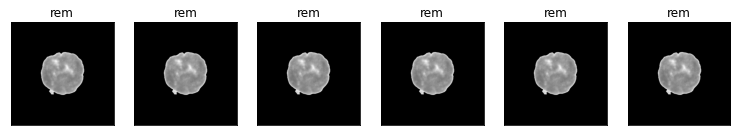

In [64]:
plot_gallery(X[np.where(y==0)[0]], ['all' for i in range(len(X))], h=450, w=450, n_row=1, n_col=6)
plot_gallery(X[np.where(y==0)[1]], ['rem' for i in range(len(X))], h=450, w=450, n_row=1, n_col=6)
